In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Student Depression Dataset.csv").drop(columns='id')
df

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [4]:
df['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

In [5]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
df['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [7]:
df['Employed'] = df["Profession"].apply(lambda x: 'No' if x=='Student' else 'Yes')
df.drop(columns='Profession',inplace=True)

In [8]:
df['Employed'].value_counts()

Employed
No     27870
Yes       31
Name: count, dtype: int64

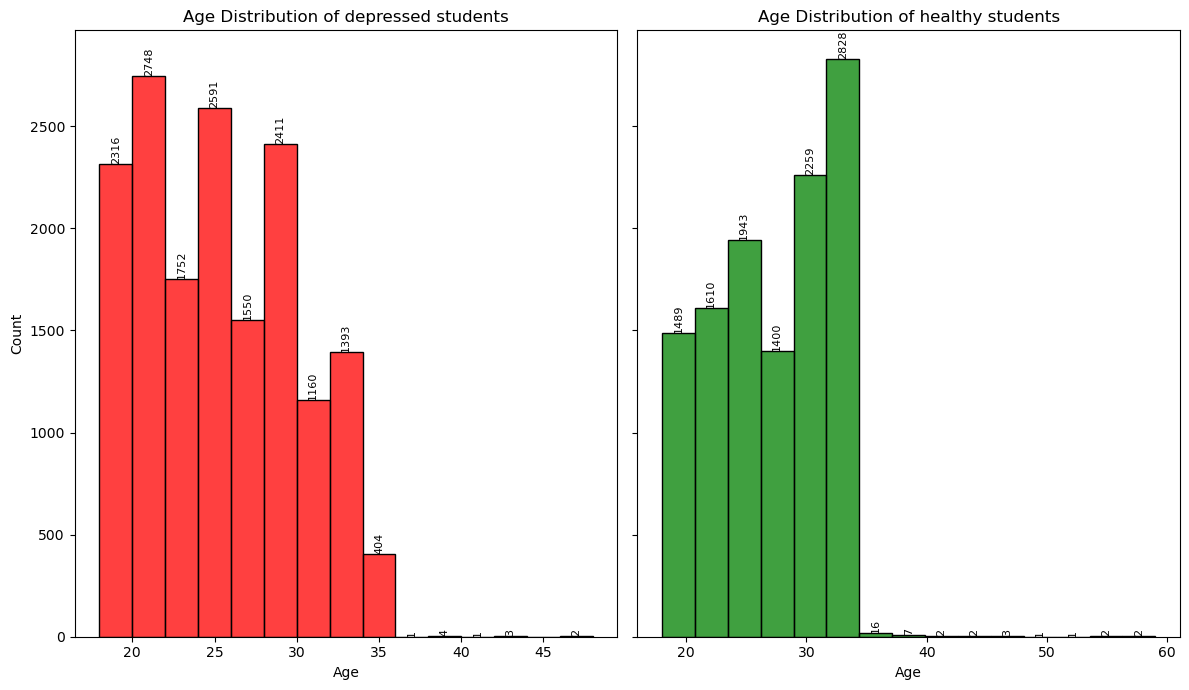

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True) 

ax1 = sns.histplot(data=df[df['Depression'] == 1], x='Age', bins=15, ax=axes[0], color='red', stat='count')
axes[0].set_title("Age Distribution of depressed students")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

for patch in ax1.patches:
    height = patch.get_height()
    if height > 0:
        axes[0].text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', 
                     ha='center', va='bottom', fontsize=8, color='black', rotation=90)

ax2 = sns.histplot(data=df[df['Depression'] == 0], x='Age', bins=15, ax=axes[1], color='green', stat='count')
axes[1].set_title("Age Distribution of healthy students")
axes[1].set_xlabel("Age")

for patch in ax2.patches:
    height = patch.get_height()
    if height > 0:
        axes[1].text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', 
                     ha='center', va='bottom', fontsize=8, color='black', rotation=90)
plt.tight_layout()
plt.show()

In [10]:
df[(df['Age'].isin([18,19,20])) & (df['Depression']==0)].shape[0]

1489

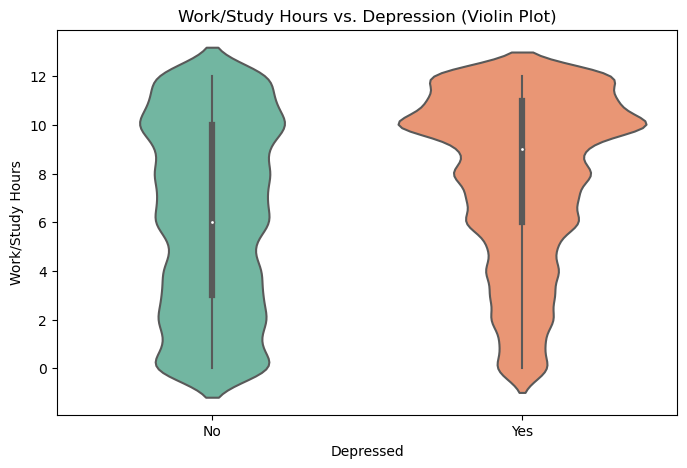

In [11]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Depression', y='Work/Study Hours', data=df, palette='Set2')
plt.title('Work/Study Hours vs. Depression (Violin Plot)')
plt.xlabel('Depressed')
plt.ylabel('Work/Study Hours')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [12]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [13]:
def sleepvalue(x):
    if x == 'Less than 5 hours':
        return 4
    elif x == '7-8 hours':
        return 7.5
    elif x == '5-6 hours':
        return 5.5
    elif x == 'More than 8 hours':
        return 9
    else:
        return None

In [14]:
df['Sleep Duration'] = df['Sleep Duration'].apply(sleepvalue)

In [15]:
df['Sleep Duration'].isnull().sum()

18

In [16]:
df['Sleep Duration'].fillna(df['Sleep Duration'].median(),inplace=True)

In [17]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10317
Moderate      9921
Healthy       7651
Others          12
Name: count, dtype: int64

In [18]:
df = df[~(df['Dietary Habits']=='Others')]

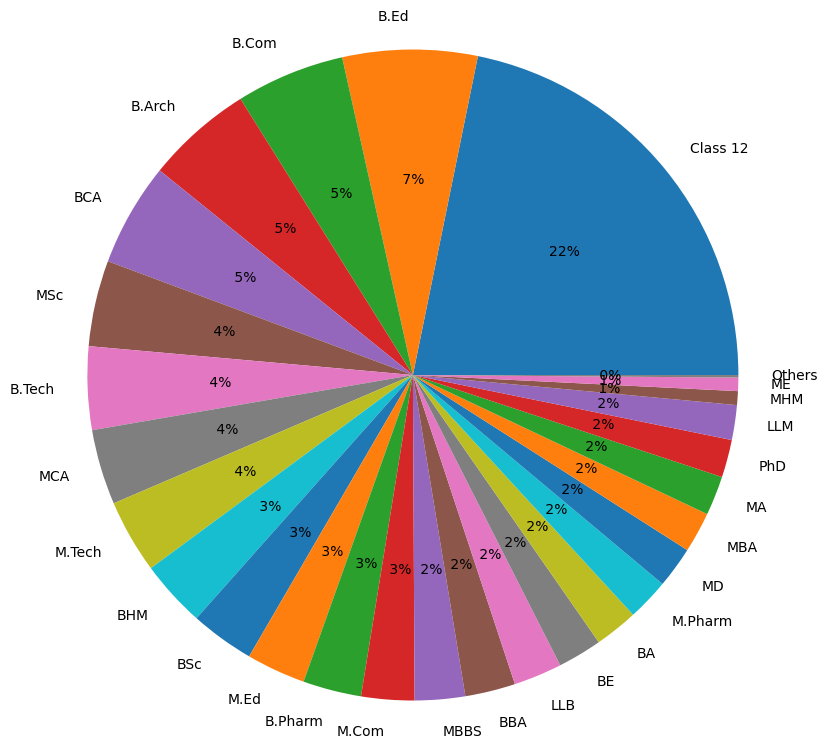

In [19]:
pie_dat = df['Degree'].value_counts().reset_index()
plt.figure(figsize=(7,10))
plt.pie(x='count',labels='Degree',data=pie_dat,radius=1.5,autopct='%2.0f%%')
plt.show()

In [20]:
cityvals = list(df['City'].value_counts()[df['City'].value_counts()>10].index)
df['City'] = df.apply(lambda x :x['City'] if x['City'] in cityvals else None,axis=1)

C:\Users\Gautam\AppData\Local\Temp\ipykernel_9056\4162875703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df.apply(lambda x :x['City'] if x['City'] in cityvals else None,axis=1)


In [21]:
print(df['City'].isnull().sum())
df.dropna(subset='City',inplace=True)

26


C:\Users\Gautam\AppData\Local\Temp\ipykernel_9056\2156230202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset='City',inplace=True)


In [22]:
df[['Age','Academic Pressure','Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction','Sleep Duration', 'Work/Study Hours','Financial Stress', 'Depression']].corr()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.076351,0.002017,0.004834,0.009726,-0.000430,-0.003487,-0.032899,-0.095018,-0.226819
Academic Pressure,-0.076351,1.000000,-0.022248,-0.022462,-0.110883,-0.024966,-0.042313,0.095813,0.151582,0.474830
Work Pressure,0.002017,-0.022248,1.000000,-0.050922,-0.021164,0.770652,0.001675,-0.005476,0.001883,-0.003352
CGPA,0.004834,-0.022462,-0.050922,1.000000,-0.043809,-0.053658,-0.004732,0.002554,0.005428,0.021662
Study Satisfaction,0.009726,-0.110883,-0.021164,-0.043809,1.000000,-0.021927,0.011937,-0.036819,-0.064994,-0.168214
Job Satisfaction,-0.000430,-0.024966,0.770652,-0.053658,-0.021927,1.000000,-0.000181,-0.005232,0.005250,-0.003483
Sleep Duration,-0.003487,-0.042313,0.001675,-0.004732,0.011937,-0.000181,1.000000,-0.027980,-0.003394,-0.084153
Work/Study Hours,-0.032899,0.095813,-0.005476,0.002554,-0.036819,-0.005232,-0.027980,1.000000,0.075797,0.208667
Financial Stress,-0.095018,0.151582,0.001883,0.005428,-0.064994,0.005250,-0.003394,0.075797,1.000000,0.363430
Depression,-0.226819,0.474830,-0.003352,0.021662,-0.168214,-0.003483,-0.084153,0.208667,0.363430,1.000000


In [23]:
df

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Employed
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1,No
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5.5,Moderate,BSc,No,3.0,2.0,Yes,0,No
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,4.0,Healthy,BA,No,9.0,1.0,Yes,0,No
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7.5,Moderate,BCA,Yes,4.0,5.0,Yes,1,No
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5.5,Moderate,M.Tech,Yes,1.0,1.0,No,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,5.0,0.0,5.75,5.0,0.0,5.5,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,No
27897,Male,27.0,Ludhiana,2.0,0.0,9.40,3.0,0.0,4.0,Healthy,MSc,No,0.0,3.0,Yes,0,No
27898,Male,31.0,Faridabad,3.0,0.0,6.61,4.0,0.0,5.5,Unhealthy,MD,No,12.0,2.0,No,0,No
27899,Female,18.0,Ludhiana,5.0,0.0,6.88,2.0,0.0,4.0,Healthy,Class 12,Yes,10.0,5.0,No,1,No


In [24]:
df.duplicated().sum()

0

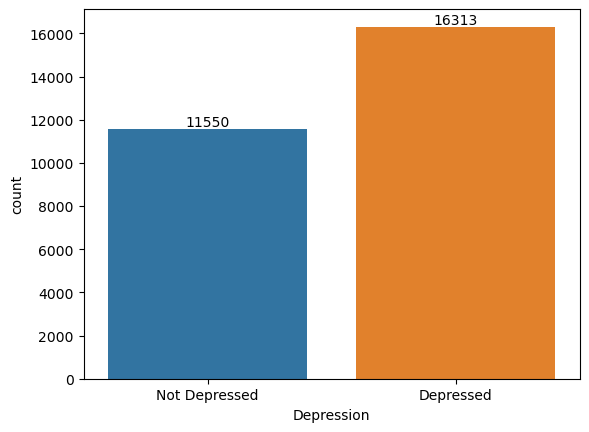

In [25]:
ax = sns.countplot(x='Depression',data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(ticks=[0,1],labels=['Not Depressed','Depressed'])
plt.show()

In [26]:
df = df[~(df['City']=='Vasai-Virar')]

In [27]:
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1340
Lucknow          1154
Thane            1139
Ludhiana         1111
Agra             1093
Surat            1078
Kolkata          1065
Jaipur           1035
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         949
Bhopal            934
Chennai           885
Meerut            824
Rajkot            816
Delhi             768
Bangalore         766
Ghaziabad         744
Mumbai            699
Vadodara          693
Varanasi          685
Nagpur            651
Indore            642
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

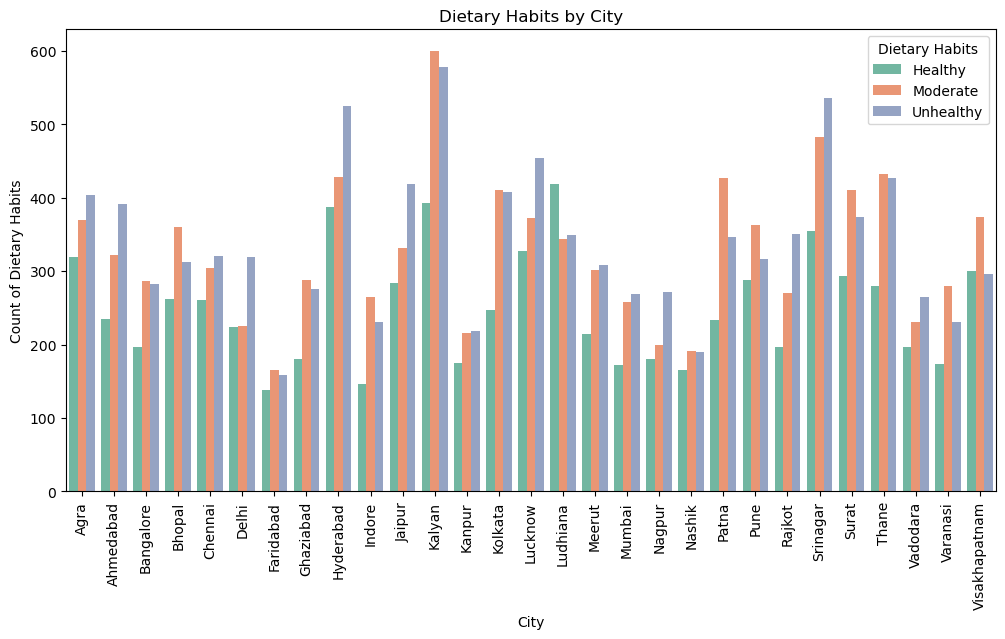

In [28]:
diet_by_city = df.groupby(['City','Dietary Habits'])['Dietary Habits'].size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Count', hue='Dietary Habits', data=diet_by_city, palette='Set2')
plt.title('Dietary Habits by City')
plt.xlabel('City')
plt.ylabel('Count of Dietary Habits')
plt.xticks(rotation=90)
plt.show()

In [54]:
diet_by_city

,City,Dietary Habits,Count
0,Agra,Healthy,319
1,Agra,Moderate,370
2,Agra,Unhealthy,404
3,Ahmedabad,Healthy,235
4,Ahmedabad,Moderate,322
...,...,...,...
82,Varanasi,Moderate,280
83,Varanasi,Unhealthy,231
84,Visakhapatnam,Healthy,300
85,Visakhapatnam,Moderate,373


In [29]:
from scipy.stats import chi2_contingency

In [30]:
vals = ['Dietary Habits','City','Gender','Have you ever had suicidal thoughts ?','Degree','Employed','Family History of Mental Illness']
for i in vals:
    print(f'{i}')
    ctab = pd.crosstab(df['Depression'],df[i])
    chi2, p, _, _ = chi2_contingency(ctab)
    if p<0.05:
        print('Accept alternative hypothesis')
    else:
        print('Accept null hypothesis')
    print('*******************************************')

Dietary Habits
Accept alternative hypothesis
*******************************************
City
Accept alternative hypothesis
*******************************************
Gender
Accept null hypothesis
*******************************************
Have you ever had suicidal thoughts ?
Accept alternative hypothesis
*******************************************
Degree
Accept alternative hypothesis
*******************************************
Employed
Accept alternative hypothesis
*******************************************
Family History of Mental Illness
Accept alternative hypothesis
*******************************************


In [31]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.reset_index(inplace=True)

Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
Employed                                 0
dtype: int64


C:\Users\Gautam\AppData\Local\Temp\ipykernel_9056\496566507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [33]:
df

,index,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Employed
0,0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1,No
1,1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5.5,Moderate,BSc,No,3.0,2.0,Yes,0,No
2,2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,4.0,Healthy,BA,No,9.0,1.0,Yes,0,No
3,3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7.5,Moderate,BCA,Yes,4.0,5.0,Yes,1,No
4,4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5.5,Moderate,M.Tech,Yes,1.0,1.0,No,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26566,27896,Female,27.0,Surat,5.0,0.0,5.75,5.0,0.0,5.5,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,No
26567,27897,Male,27.0,Ludhiana,2.0,0.0,9.40,3.0,0.0,4.0,Healthy,MSc,No,0.0,3.0,Yes,0,No
26568,27898,Male,31.0,Faridabad,3.0,0.0,6.61,4.0,0.0,5.5,Unhealthy,MD,No,12.0,2.0,No,0,No
26569,27899,Female,18.0,Ludhiana,5.0,0.0,6.88,2.0,0.0,4.0,Healthy,Class 12,Yes,10.0,5.0,No,1,No


In [34]:
enc = OneHotEncoder(sparse_output=False,drop='first')
enc_arr = enc.fit_transform(df[['Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness','Employed']])
enc_df = pd.DataFrame(enc_arr, columns=enc.get_feature_names_out()).reset_index()

In [35]:
print(enc_df.shape)
print(df.shape)

(26571, 6)
(26571, 18)


In [36]:
df = df.drop(columns=['Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness','Employed'])

In [37]:
df = pd.concat((df,enc_df),axis=1).drop(columns='index')
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Degree',
       'Work/Study Hours', 'Financial Stress', 'Depression',
       'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy',
       'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_Yes', 'Employed_Yes'],
      dtype='object')

In [38]:
X=df.drop(columns=['City','Gender','Work Pressure','Degree','CGPA','Study Satisfaction','Job Satisfaction','Sleep Duration','Depression'])
Y=df['Depression']

In [39]:
X

,Age,Academic Pressure,Work/Study Hours,Financial Stress,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Employed_Yes
0,33.0,5.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0
1,24.0,2.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0
2,31.0,3.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0
3,28.0,3.0,4.0,5.0,1.0,0.0,1.0,1.0,0.0
4,25.0,4.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26566,27.0,5.0,7.0,1.0,0.0,1.0,1.0,1.0,0.0
26567,27.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
26568,31.0,3.0,12.0,2.0,0.0,1.0,0.0,0.0,0.0
26569,18.0,5.0,10.0,5.0,0.0,0.0,1.0,0.0,0.0


In [40]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=30)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [41]:
x_test[:100]

,Age,Academic Pressure,Work/Study Hours,Financial Stress,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,Employed_Yes
10999,28.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0
15655,19.0,3.0,8.0,4.0,0.0,0.0,1.0,1.0,0.0
8994,28.0,5.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0
16264,19.0,2.0,7.0,1.0,0.0,1.0,1.0,0.0,0.0
9882,31.0,2.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
14188,22.0,2.0,6.0,2.0,1.0,0.0,0.0,1.0,0.0
18157,28.0,5.0,6.0,3.0,0.0,0.0,1.0,0.0,0.0
23198,19.0,5.0,9.0,5.0,1.0,0.0,0.0,1.0,0.0
11521,28.0,4.0,11.0,5.0,1.0,0.0,1.0,1.0,0.0


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = tree.predict(x_test)
acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy is: ',acc)

Accuracy is:  0.8336594911937377


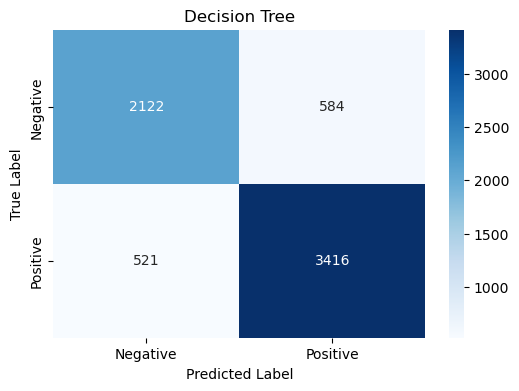

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree")
plt.show()

0.8434442270058709


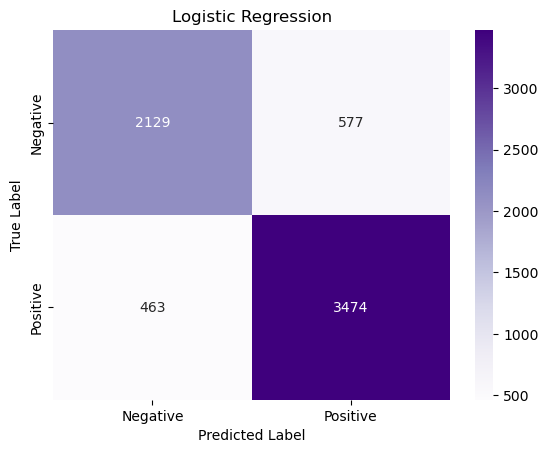

In [44]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(max_iter=250)
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d',cmap='Purples', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression")
plt.show()

In [45]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=(9,)), 
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                200       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
623/623 [==============================] - 4s 4ms/step - loss: 0.4947 - accuracy: 0.7732 - val_loss: 0.3962 - val_accuracy: 0.8248
Epoch 2/10
623/623 [==============================] - 2s 3ms/step - loss: 0.3787 - accuracy: 0.8326 - val_loss: 0.3709 - val_accuracy: 0.8424
Epoch 3/10
623/623 [==============================] - 2s 3ms/step - loss: 0.3740 - accuracy: 0.8338 - val_loss: 0.3749 - val_accuracy: 0.8376
Epoch 4/10
623/623 [==============================] - 2s 3ms/step - loss: 0.3711 - accuracy: 0.8371 - val_loss: 0.3684 - val_accuracy: 0.8413
Epoch 5/10
623/623 [==============================] - 2s 3ms/step - loss: 0.3698 - accuracy: 0.8356 - val_loss: 0.3699 - val_accuracy: 0.8398
Epoch 6/10
623/623 [==============================] - 2s 3ms/step - loss: 0.3673 - accuracy: 0.8390 - val_loss: 0.3677 - val_accuracy: 0.8401
Epoch 7/10
623/623 [==============================] - 2s 3ms/step - loss: 0.3663 - accuracy: 0.8410 - val_loss: 0.3657 - val_accuracy: 0.8424
Epoch 

In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

208/208 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8389
Test Accuracy: 0.83892822265625


In [48]:
from sklearn.svm import SVC
smod = SVC(kernel='linear')
smod.fit(x_train,y_train)

SVC(kernel='linear')

0.8443474333885292


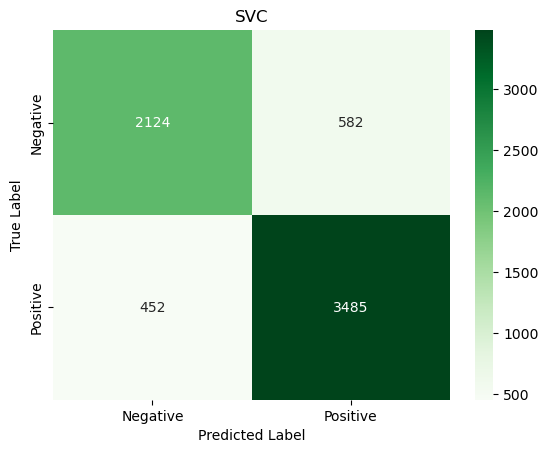

In [49]:
spred = smod.predict(x_test)
sacc = accuracy_score(y_test,spred)
print(sacc)
sns.heatmap(confusion_matrix(y_test,spred),annot=True,cmap='Greens',fmt='d', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVC")
plt.show()

In [50]:
from xgboost import XGBClassifier
xmodel = XGBClassifier(n_estimators=40, max_depth=6, learning_rate=0.1)
xmodel.fit(x_train, y_train)
xy_pred = xmodel.predict(x_test)

print("Accuracy:", accuracy_score(y_test, xy_pred))

Accuracy: 0.8460033117567364


In [51]:
test = np.array([20, 2, 3, 0, 1, 0, 1, 0, 0]).reshape(1,-1)
print(mod.predict(test))

[0]


C:\Users\Gautam\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


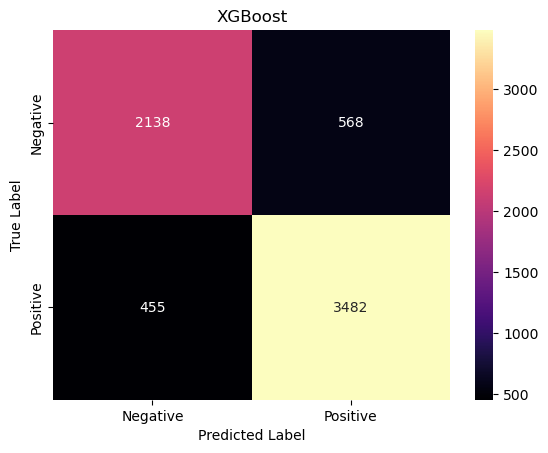

In [52]:
sns.heatmap(confusion_matrix(y_test,xy_pred),annot=True,fmt='d',cmap='magma', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost")
plt.show()

In [53]:
import joblib
joblib.dump(xmodel,'xboostdepro.pkl')

['xboostdepro.pkl']